# ReduceFeaturesByCollinearity   


In [1]:
import pandas as pd
from scipy import stats
import math
import numpy as np

# load input file into data frame
data = pd.read_csv("../output/03/dfg2_homa_mod2.csv", header= 0, index_col=0) 



#check dimension
data.shape # should be 13661

(13661, 93)

In [2]:
np.random.seed(0)

In [3]:
data.columns

Index(['Age', 'BMI', 'Sex', 'Ethnicity', 'Carbohydrate',
       'Fiber, total dietary', 'Sugars, total', 'Alcohol', 'Arabinan',
       'Galactan', 'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan', 'Chitin',
       'Starch', 'Cellulose', 'Arabinoxylan', 'Galactomannan', 'Free_Fructose',
       'Free_Glucose', 'Free_Sucrose', 'Free_Maltose',
       'Free_Lactose(trehalose)', 'Free_Kestose', 'Free_Raffinose',
       'Free_Maltotetraose', 'Free_Stachyose', 'Free_Maltopentaose',
       'Free_Verbascose', 'Free_Maltohexaose', 'Mono_Glucose',
       'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose', 'Mono_Arabinose',
       'Mono_Fucose', 'Mono_Rhamnose', 'Mono_GalA', 'Mono_Mannose',
       'Mono_Ribose', 't-Glucose', '4-Glucose', '6-Glucose',
       '3-Glucose/3-Galactose', '2-Glucose', '4,6-Glucose', '3,4-Glucose',
       '2,4-Glucose', '3,4,6-Glucose', 't-Galactose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-

In [4]:
# drop the categorical columns and alcohol
dataN = data.drop(['Age', 'BMI', 'Sex', 'Ethnicity', 'Alcohol'], axis = 1)

In [5]:
# drop rows with NAs
dataN = dataN.dropna(axis=0)

In [6]:
# check dimension again
dataN.shape

(13661, 88)

In [7]:
data_rev = dataN.iloc[:, ::-1] #column order matters

In [8]:
# get feature names
feature_names = (dataN.columns)

In [9]:
feature_names

Index(['Carbohydrate', 'Fiber, total dietary', 'Sugars, total', 'Arabinan',
       'Galactan', 'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan', 'Chitin',
       'Starch', 'Cellulose', 'Arabinoxylan', 'Galactomannan', 'Free_Fructose',
       'Free_Glucose', 'Free_Sucrose', 'Free_Maltose',
       'Free_Lactose(trehalose)', 'Free_Kestose', 'Free_Raffinose',
       'Free_Maltotetraose', 'Free_Stachyose', 'Free_Maltopentaose',
       'Free_Verbascose', 'Free_Maltohexaose', 'Mono_Glucose',
       'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose', 'Mono_Arabinose',
       'Mono_Fucose', 'Mono_Rhamnose', 'Mono_GalA', 'Mono_Mannose',
       'Mono_Ribose', 't-Glucose', '4-Glucose', '6-Glucose',
       '3-Glucose/3-Galactose', '2-Glucose', '4,6-Glucose', '3,4-Glucose',
       '2,4-Glucose', '3,4,6-Glucose', 't-Galactose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-p-Xylose', '3-Xylose', '2-Xylose',
       '3,4-P-Xyl

In [10]:
#following 3 chunks written by :
#D. Lemay  May 13, 2020   

# set up dictionary
clusters_hash = {}
# Correlation threshold (might take some fiddling to find ideal)
THRESH = 0.8

In [11]:
# for each feature in feature list
for f in feature_names:
    #print(f)
    #print(data[f])
    corr_flag = 0;
    #print(corr_flag)
    # check if it is correlated with any feature already in the dictionary
    for key in clusters_hash.keys():
        coef, p = stats.spearmanr(dataN[f], dataN[key])
        #print(coef)
        if abs(coef) > THRESH:
            corr_flag = 1 
        #print("key is", key, " correlation is ", corr_flag)
    if corr_flag ==0:
        clusters_hash[f] = 1


In [12]:
# print list of reduced features
for key in clusters_hash.keys():
    print(key)

Carbohydrate
Fiber, total dietary
Sugars, total
Arabinan
Galactan
Xyloglucan
Chitin
Starch
Cellulose
Galactomannan
Free_Fructose
Free_Sucrose
Free_Maltose
Free_Lactose(trehalose)
Free_Kestose
Free_Raffinose
Free_Maltotetraose
Free_Stachyose
Free_Verbascose
Mono_Galactose
Mono_Fructose
Mono_Xylose
Mono_Fucose
Mono_Rhamnose
Mono_Mannose
Mono_Ribose
t-Glucose
4-Glucose
6-Glucose
3-Glucose/3-Galactose
2-Glucose
4,6-Glucose
3,4-Glucose
3,4,6-Glucose
6-Galactose
4-Galactose
2-Galactose
4,6-Galactose
3,6-Galactose
3,4-Galactose
t-p-Xylose
4-p-Xylose
3-Xylose
2-Xylose
3,4-P-Xylose/3,5-Arabinose
2,4-p-Xylose
t-f-Arabinose
3-Arabinose
2,3-f-Arabinose
t-Fucose
t-Rhamnose
4-Rhamnose
2-Rhamnose
4-Glucosamine/GlcNac
3-Glucosamine/GlcNac
t-Mannose
4-Mannose
3-Mannose
4,6-Mannose
X-Hexose
2,X,X-Hexose (I)
2,X,X-Hexose (II)
2,X,X-Hexose (III)
t-Deoxyhexose
poly_diversity
free_diversity
mono_diversity
linkage_diversity
free_ratio


In [13]:
def getList(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
          
    return list

In [14]:
features_keep = getList(clusters_hash)

In [15]:
len(features_keep) 

69

In [16]:
[col for col in data.columns if col not in features_keep] #features dropped

['Age',
 'BMI',
 'Sex',
 'Ethnicity',
 'Alcohol',
 'Xylan',
 'Mannan',
 'Beta-Glucan',
 'Arabinoxylan',
 'Free_Glucose',
 'Free_Maltopentaose',
 'Free_Maltohexaose',
 'Mono_Glucose',
 'Mono_Arabinose',
 'Mono_GalA',
 '2,4-Glucose',
 't-Galactose',
 't-p-Arabinose',
 '5-f-Arabinose',
 '2-f-Arabinose',
 '2,4-Rhamnose',
 '2-Mannose',
 '2,X-Mannose',
 '3,4,6-Mannose']

In [17]:
# will examine feature dependence plot to see which features are correlated
# then select features that are molecularly similar (redundant physiological handling) to remove

In [19]:
x_dt = data[features_keep]

In [20]:
x_dt.columns 

Index(['Carbohydrate', 'Fiber, total dietary', 'Sugars, total', 'Arabinan',
       'Galactan', 'Xyloglucan', 'Chitin', 'Starch', 'Cellulose',
       'Galactomannan', 'Free_Fructose', 'Free_Sucrose', 'Free_Maltose',
       'Free_Lactose(trehalose)', 'Free_Kestose', 'Free_Raffinose',
       'Free_Maltotetraose', 'Free_Stachyose', 'Free_Verbascose',
       'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose', 'Mono_Fucose',
       'Mono_Rhamnose', 'Mono_Mannose', 'Mono_Ribose', 't-Glucose',
       '4-Glucose', '6-Glucose', '3-Glucose/3-Galactose', '2-Glucose',
       '4,6-Glucose', '3,4-Glucose', '3,4,6-Glucose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-p-Xylose', '3-Xylose', '2-Xylose',
       '3,4-P-Xylose/3,5-Arabinose', '2,4-p-Xylose', 't-f-Arabinose',
       '3-Arabinose', '2,3-f-Arabinose', 't-Fucose', 't-Rhamnose',
       '4-Rhamnose', '2-Rhamnose', '4-Glucosamine/GlcNac',
       '3-Glucosamine/GlcNac

In [21]:
# not run after inclusion of diversity / free-ratio features as they are not removed (below spearman corr threshold) 

In [22]:
from rfpimp import feature_dependence_matrix
from rfpimp import plot_dependence_heatmap

In [23]:
#full features
ff = feature_dependence_matrix(dataN)

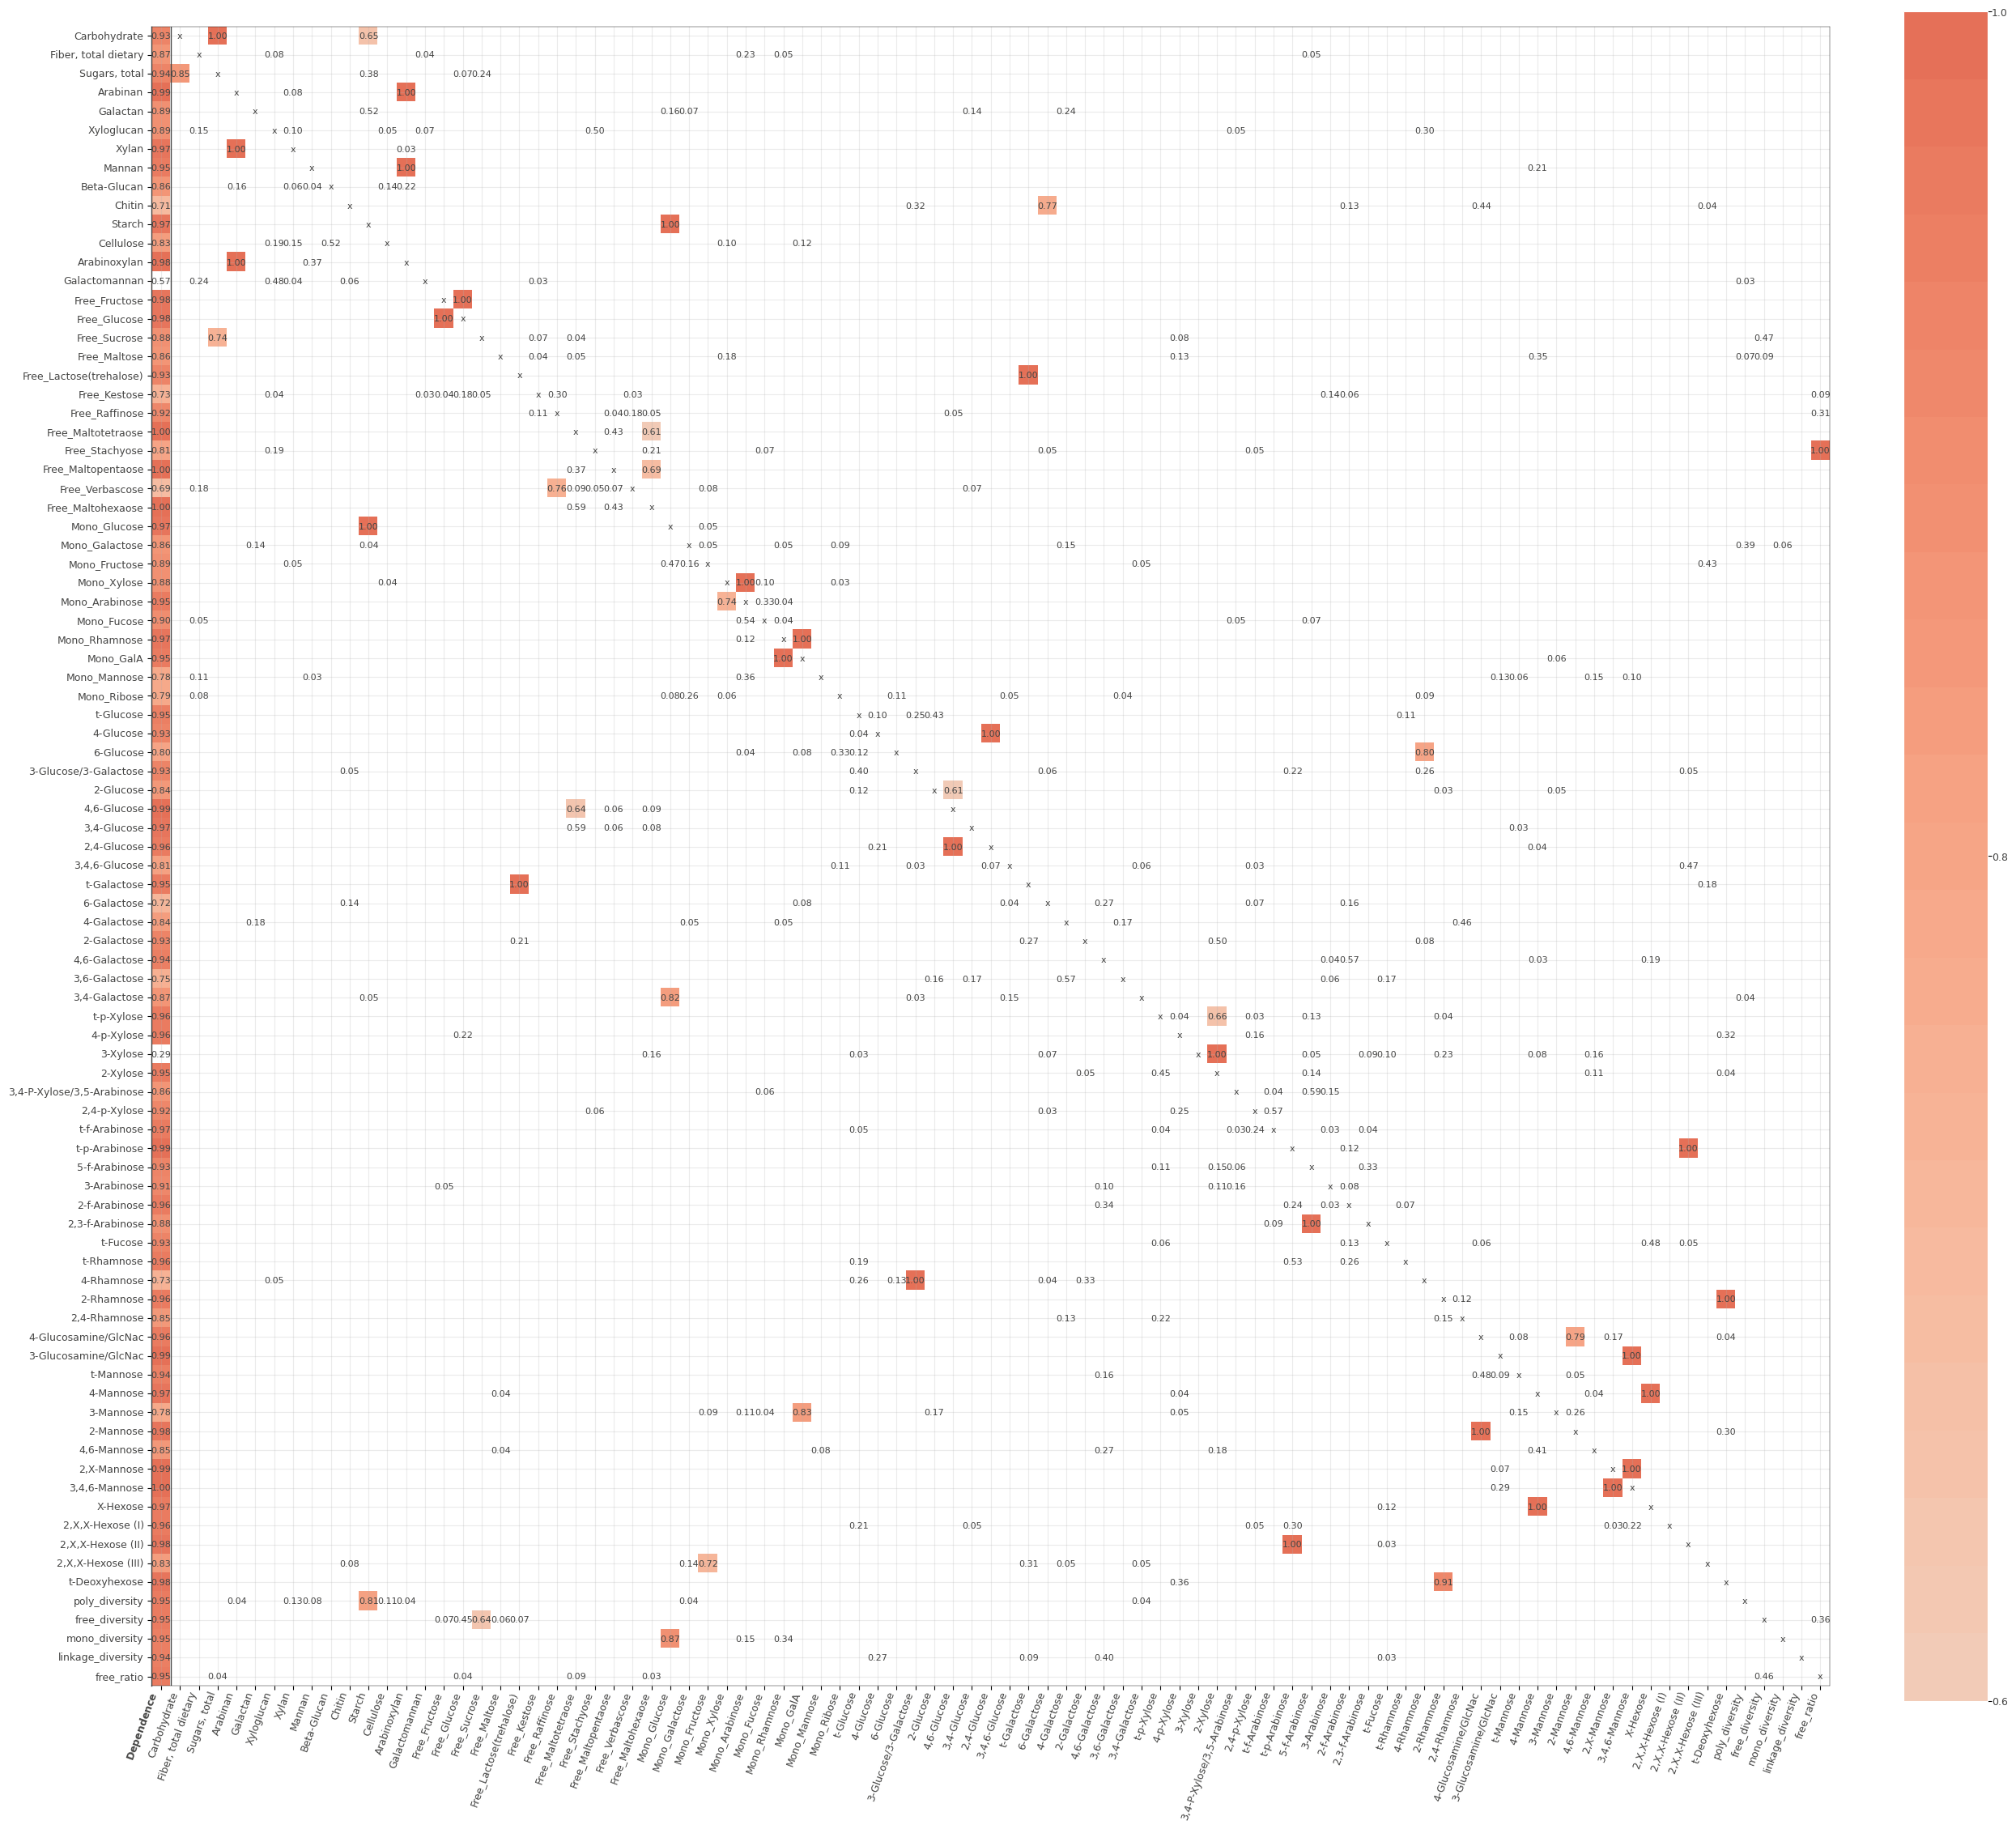

In [24]:
ffviz = plot_dependence_heatmap(ff, figsize = (25,25))
ffviz
ffviz.save('../data/plots/mod1_dependence_all_updated.pdf')

In [25]:
#full features
# f_filt = feature_dependence_matrix(x_dt)
# filtviz = plot_dependence_heatmap(f_filt, figsize = (25,25))
# filtviz
# filtviz.save("../data/plots/mod2_dependence_src80.pdf")

In [26]:
data.columns

Index(['Age', 'BMI', 'Sex', 'Ethnicity', 'Carbohydrate',
       'Fiber, total dietary', 'Sugars, total', 'Arabinan', 'Galactan',
       'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan', 'Chitin', 'Starch',
       'Cellulose', 'Arabinoxylan', 'Galactomannan', 'Free_Fructose',
       'Free_Glucose', 'Free_Sucrose', 'Free_Maltose',
       'Free_Lactose(trehalose)', 'Free_Kestose', 'Free_Raffinose',
       'Free_Maltotetraose', 'Free_Stachyose', 'Free_Maltopentaose',
       'Free_Verbascose', 'Free_Maltohexaose', 'Mono_Glucose',
       'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose', 'Mono_Arabinose',
       'Mono_Fucose', 'Mono_Rhamnose', 'Mono_GalA', 'Mono_Mannose',
       'Mono_Ribose', 't-Glucose', '4-Glucose', '6-Glucose',
       '3-Glucose/3-Galactose', '2-Glucose', '4,6-Glucose', '3,4-Glucose',
       '2,4-Glucose', '3,4,6-Glucose', 't-Galactose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-p-Xylose', 

In [28]:
data_filt = data.drop(['Mono_Glucose', 'Mono_Arabinose', 'Arabinoxylan', '4-Glucosamine/GlcNac',
                       'Free_Maltopentaose', '3-Glucosamine/GlcNac', 'X-Hexose',
       '2,X,X-Hexose (I)', '2,X,X-Hexose (II)', '2,X,X-Hexose (III)',
       't-Deoxyhexose', 'free_ratio'], axis=1)
data_filt.columns

Index(['Age', 'BMI', 'Sex', 'Ethnicity', 'Carbohydrate',
       'Fiber, total dietary', 'Sugars, total', 'Arabinan', 'Galactan',
       'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan', 'Chitin', 'Starch',
       'Cellulose', 'Galactomannan', 'Free_Fructose', 'Free_Glucose',
       'Free_Sucrose', 'Free_Maltose', 'Free_Lactose(trehalose)',
       'Free_Kestose', 'Free_Raffinose', 'Free_Maltotetraose',
       'Free_Stachyose', 'Free_Verbascose', 'Free_Maltohexaose',
       'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose', 'Mono_Fucose',
       'Mono_Rhamnose', 'Mono_GalA', 'Mono_Mannose', 'Mono_Ribose',
       't-Glucose', '4-Glucose', '6-Glucose', '3-Glucose/3-Galactose',
       '2-Glucose', '4,6-Glucose', '3,4-Glucose', '2,4-Glucose',
       '3,4,6-Glucose', 't-Galactose', '6-Galactose', '4-Galactose',
       '2-Galactose', '4,6-Galactose', '3,6-Galactose', '3,4-Galactose',
       't-p-Xylose', '4-p-Xylose', '3-Xylose', '2-Xylose',
       '3,4-P-Xylose/3,5-Arabinose', '2,4-p-Xylose', 't

In [29]:
data_filt.shape

(13661, 80)

In [30]:
data_filt.to_csv("../output/04/mod_filt.csv", index = True)